Jacivania Cordeiro Nunes, Matr. 9040898

World Happiness Report



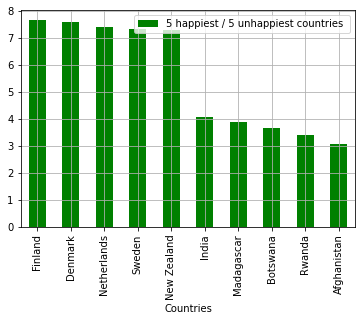

In [ ]:
import pandas as pd
import numpy as np

#1.1 Read the 3 datasets
df19 = pd.read_csv('/tmp/report_2013_to_2019.csv')
df20 = pd.read_csv('/tmp/report_2020.csv')
df21 = pd.read_csv('/tmp/report_2021.csv')

#1.2 Remove the columns Negative affect and Positive affect
df19.drop(columns=["Positive affect", "Negative affect"], inplace=True)

#1.3 Add the column "YEAR" 
df20["year"] = 2020
df21["year"] = 2021

#1.4 Rename the column headers
df19.rename(columns={"Life Ladder": "Ladder score", "Log GDP per capita": "Logged GDP per capita", "Healthy life expectancy at birth": "Healthy life expectancy"}, inplace=True)

#1.5 Merge all together
df = pd.concat([df19, df20, df21])

#2.1 Remove empty cells
df.dropna(inplace=True)

#2.2 Sort 
df.sort_values(["Country name", "year"], inplace=True)

#2.3 Delete all data that don´t have full range
countries = df["Country name"].unique()
for country in countries:
  entries = (df.loc[(df["Country name"] == country) & (df["year"] >= 2013) & (df["year"] <= 2021)])
  hasAllYears = (len(entries["year"].unique()) == 2021 - 2013 + 1)
  if not hasAllYears:
    df.drop(df[df["Country name"] == country].index, inplace=True)

#3.1  Save Tasks 1 and 2
df.to_csv("/tmp/report_processed.csv")

#3.2 Calculate everage
countries = df["Country name"].unique()
avgScores = {}
for country in countries:
  entries = (df.loc[(df["Country name"] == country) & (df["year"] >= 2013) & (df["year"] <= 2021)])
  avg = entries["Ladder score"].mean()
  avgScores[country] = avg

#3.3 plots
sortedScoresCountry = sorted(avgScores, reverse=True, key=avgScores.get)
sortedScoresCountry = sortedScoresCountry[:5] + sortedScoresCountry[-5:]
sortedScoresValues = [avgScores[country] for country in sortedScoresCountry]
dfPlot = pd.DataFrame({'Countries': sortedScoresCountry, 'Ladder score avg': sortedScoresValues})
plot = dfPlot.plot.bar(x='Countries', y='Ladder score avg',color ='green',label="5 happiest / 5 unhappiest countries ")
plot.grid()
plot.legend()




